<h1><center>Basic Statistical Concepts</center></h1>
<h1><center>Topics Covered:</center></h1>

<h3><center>-Descriptive and Inferential Statistics</center></h3>
<h3><center>-Population and Samples</center></h3>
<h3><center>-Parameters and Statistics</center></h3>
<h3><center>-Variable Classifications</center></h3>
<h3><center>-Scale of Measurement</center></h3>
<h3><center>-Statistical Methods</center></h>

In [1]:
libname statdata "/folders/myfolders/ECST131"; 
libname library "/folders/myfolders/ECST131";

<img src="files/EDA.png">

<img src="files/ExpPred.png">

<h1><center>Descriptive Statistics (EDA)</center></h1>
<h1><center>Topic to be Convered:</center></h1>

<h3><center>Screen for unusal values</center></h3>
<h3><center>Inspect the spread and shape</center></h3>
<h3><center>Characterize Central Tendency</center></h3>
<h3><center>Draw Preliminary Conclusions</center></h3>

<img src="files/univariate.png">

<img src="files/multivariate.png">

<img src="files/multivariable.png">

<h1><center>Descriptive Statistics</center></h1>

<img src="files/proc_means.png">

<h1><center>Picturing Your Data</center></h1>

<img src="files/normal_dist.png">

<img src="files/normaldist.png">

<img src="files/normaldist1.png">

<img src="files/boxplot.png">

<img src="files/normdist2.png">

<img src="files/normaldist2.png">

<img src="files/univariate1.png">

<img src="files/sgplot.png">

### Determine if variables BodyTemp and HeartRate in the Statdata.NormTemp data set are normally distributed and if average body temperature is truly 98.6 degrees.

#### Task: Determine the minimum, maximum, mean, and standard deviation for the variables BodyTemp and HeartRate in the NormTemp data set. Also calculate the skewness and kurtosis statistics. Do the variables appear to be normally distributed?

#### Result: The distributions for both variables look approximately normal. Because the histograms are bell shaped and the data follows the diagonal reference lines in the normal probability plots, the variables BodyTemp and HeartRate are both normally distributed. The skewness and kurtosis statistics are fairly close to zero for both variables as well, which tells us that BodyTemp and HeartRate are approximately normal.


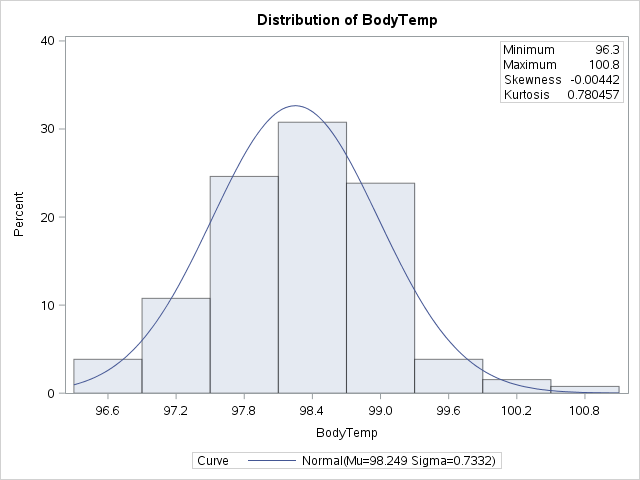
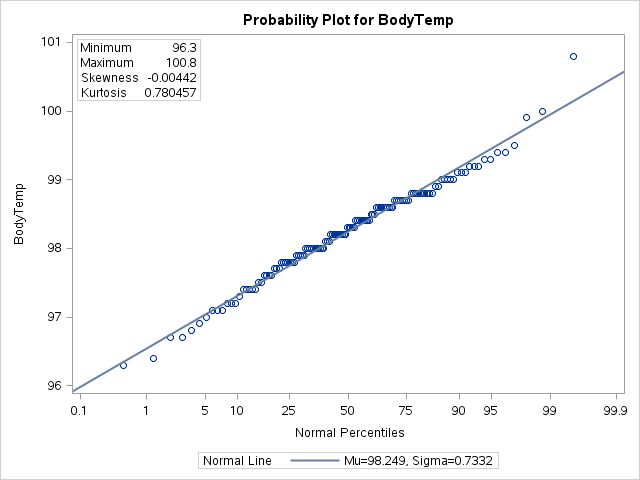
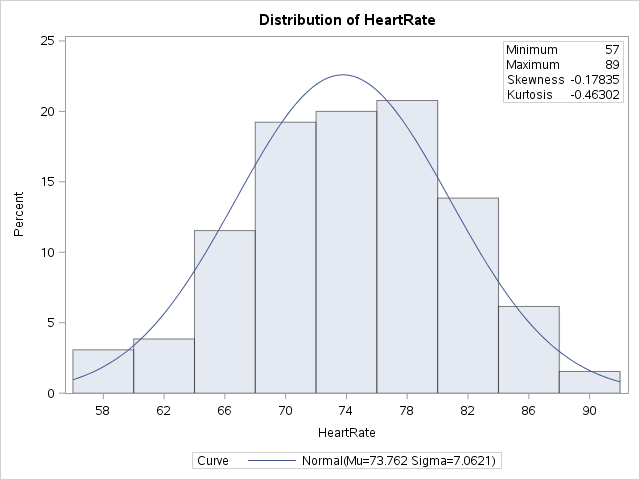
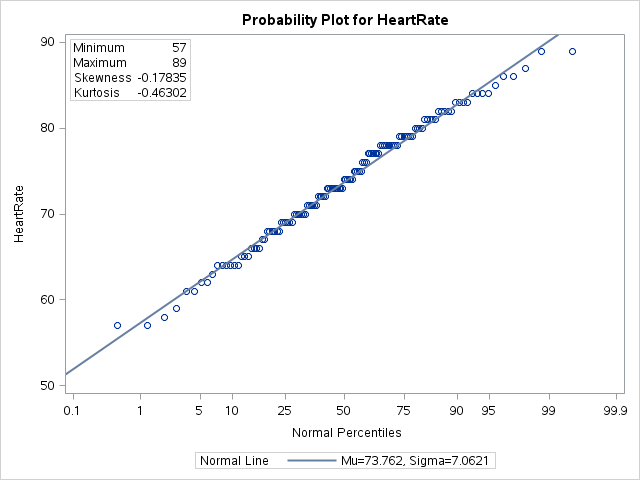

In [14]:
proc univariate data=statdata.normtemp noprint;
   var BodyTemp HeartRate;
   histogram BodyTemp HeartRate / normal(mu=est sigma=est noprint);
   inset min max skewness kurtosis / position=ne;
   probplot BodyTemp HeartRate / normal(mu=est sigma=est);
   inset min max skewness kurtosis;
   title 'Descriptive Statistics Using PROC UNIVARIATE';
run;
title;

### Task: Create box plots for the BodyTemp and HeartRate variables. Use ID to identify outliers. For BodyTemp, display a reference line at 98.6 degrees. Does the average body temperature seem to be 98.6 degrees? 

### Result: The average body temperature seems to be somewhat less than 98.6 degrees


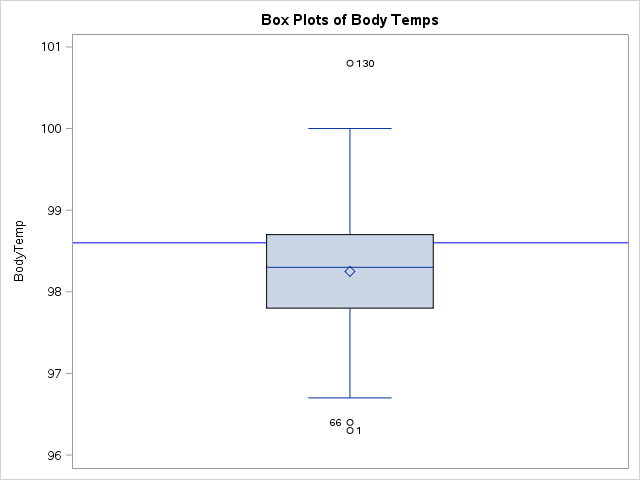
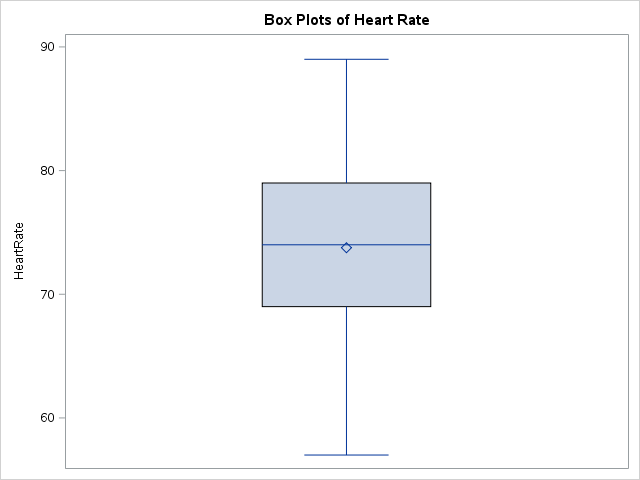

In [6]:
proc sgplot data=statdata.normtemp;
    refline 98.6 / axis=y lineattrs=(color=blue);
    vbox BodyTemp / datalabel=ID;
    title "Box Plots of Body Temps";
run;

proc sgplot data=statdata.normtemp;
    vbox HeartRate / datalabel=ID;
    title "Box Plots of Heart Rate";
run;
title;

<h1><center>Confidence Intervals for the Means</center></h1>

### Task: Is the assumption of normality met to produce a confidence interval for these data? 

### Result: The normality assumption seems to hold because the sample size is large enough. Also, the distribution histogram looks normal.  The Skewness indicates a normal curve and the kurtosis is slightly leptokurtic. The Q-Q plot indicates a normal distribution. 


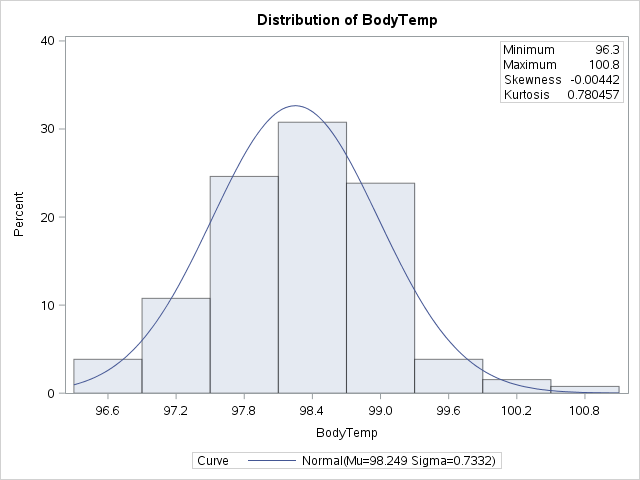
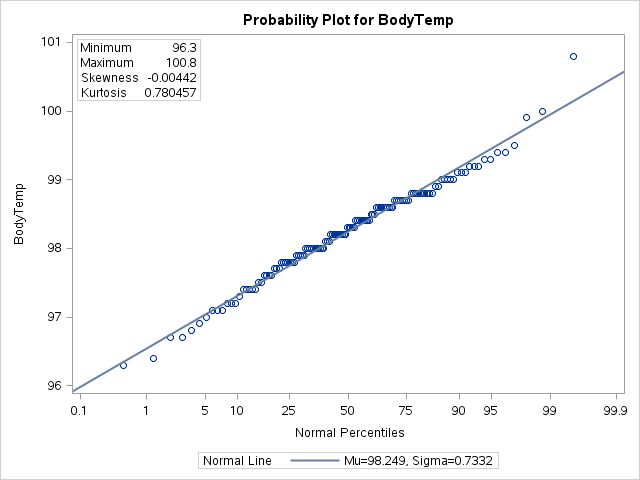

In [3]:
proc univariate data=statdata.normtemp noprint;
   var BodyTemp;
   histogram BodyTemp / normal(mu=est sigma=est noprint);
   inset min max skewness kurtosis / position=ne;
   probplot BodyTemp / normal(mu=est sigma=est);
   inset min max skewness kurtosis;
   title 'Descriptive Statistics for BodyTemp';
run;
title;

 ### Task: Use PROC MEANS to generate a 95% confidence interval for the mean of BodyTemp in the NormTemp data set. 
 
 ### Result: The 95% confidence interval is 98.12 to 98.38 degrees Fahrenheit. I am 95% confident that the true mean body temperature for the population of all people in the world is somewhere between 98.12 and 98.38 degrees.

In [4]:
proc means data=Statdata.NormTemp maxdec=4 n mean stderr clm; 
    var BodyTemp; 
    title 'Confidence Interval for BodyTemp';
run;
title; 

<h1><center>Hypothesis Testing</center></h1>

<img src="files/hyp_test.png">

<h2><center>Decison Making Process</center></h2>

<h2><center>Type I & II Errors</center></h2>

<img src="files/errors.png">

### Error, Power, Effect Size

##### Probability of a Type I error = a 
##### Probability of a Type Il error = ß 
##### Type I & II are inversely related to each other.
##### Probability of a Correct Rejection = (1 — ß) = Power 
##### Effect size = the difference between the observed statistic and the hypothesized value 


### Hypothesis Testing:

Fail to reject the null hypothesis if the p-value is >= alpha 
You reject the null hypothesis If the p-value is <= to alpha
You never conclude that two things are the same or have no relationship, you can only fail to show a difference or a relationship. 

<img src="files/pvalue.png">

<img src="files/tstat.png">

<img src="files/null.png">

<img src="files/proc_univ.png">

### Task: Using PROC Univariate to Perform a One-Sample t-Test.  Perform a one-sample t-test for the variable BodyTemp to confirm whether average body temperature is truly 98.6 degrees.

### Result: The value of the t statistic and the corresponding p-value are -5.45 and <.0001 respectively. The null hypothesis is that the population mean is equal to 98.6. The alternative hypothesis is that the population mean is not equal to 98.6. Because the p-value is less than the stated alpha level of .05, you do reject the null hypothesis.

In [10]:
ods select testsforlocation;
title 'Testing Whether the Average Body Temp=98.6';
proc univariate data=Statdata.NormTemp mu0=98.6 alpha=.05; 
    var BodyTemp; 
run; 